In [0]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [5]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

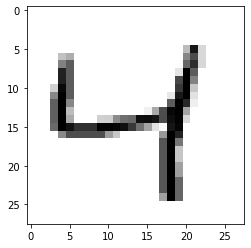

In [32]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2], cmap=plt.cm.binary)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [21]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.22210832,  0.0031929 ,  0.00748727,  0.07036947, -0.86682963,
        -0.2384169 ,  0.65175265,  0.05568378,  0.46774438, -1.1011479 ]],
      dtype=float32)

In [23]:
tf.nn.softmax(predictions).numpy()

array([[0.11954467, 0.09604095, 0.09645429, 0.10271429, 0.0402356 ,
        0.07542697, 0.1837056 , 0.10121689, 0.15283   , 0.03183078]],
      dtype=float32)

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [25]:
loss_fn(y_train[:1], predictions).numpy()

2.5845904

In [0]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1446 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1086 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0761 - accuracy: 0.9769


In [28]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0746 - accuracy: 0.9757


[0.07461561262607574, 0.9757000207901001]

In [0]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [30]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.36456913e-06, 1.97434904e-08, 5.69835356e-06, 8.65937400e-05,
        1.57395676e-11, 4.73816897e-08, 1.63202141e-14, 9.99902964e-01,
        1.02677134e-07, 3.28802071e-06],
       [1.70267871e-08, 5.42594762e-06, 9.99936223e-01, 3.49052425e-05,
        1.24194763e-13, 7.64908009e-07, 1.62468477e-05, 9.28877590e-15,
        6.41647875e-06, 8.27611752e-15],
       [2.54635836e-07, 9.98416424e-01, 1.47399551e-04, 8.70892327e-05,
        7.14297130e-05, 1.44726037e-05, 9.30345923e-05, 8.64345813e-04,
        3.01688618e-04, 3.86191005e-06],
       [9.99975920e-01, 1.53652813e-09, 3.74671163e-06, 7.99106346e-08,
        6.17832882e-07, 1.30327617e-05, 1.49474863e-06, 2.39587689e-06,
        1.33211643e-07, 2.66158918e-06],
       [5.24310735e-07, 2.57999844e-09, 1.98053294e-06, 2.89424605e-07,
        9.85267878e-01, 1.68580266e-06, 6.66283813e-06, 1.20487726e-04,
        8.52883477e-06, 1.45919947e-02]], dtype=float32)>